In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

Data = pd.read_csv('Dataset_feuilles_1.csv')
Test = pd.read_csv('test.csv')

Data.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
X = Data.iloc[:,2:]
y = Data.iloc[:,1]

In [4]:
#On crée des échantillons d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

len(x_train),len(x_test)

(792, 198)

In [5]:
#Commençons par normaliser nos variables

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

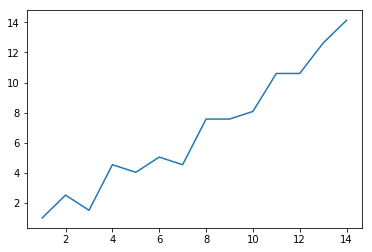

In [6]:
#On choisit les plus proches voisins comme modèle de base

from sklearn import neighbors

#La prochaine étape est le choix du meilleur hyperparamètre k pour l'algorithme des plus
#proches voisins.

errors=[]

for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(x_train_scaled, y_train).score(x_test_scaled, y_test)))
plt.plot(range(1,15),errors)

In [8]:
#Le meilleur k est 1

knn = neighbors.KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_scaled,y_train)

#Calcul du score de l'algorithme pour k=1

round(knn.score(x_test_scaled,y_test),4)

0.9899

In [10]:
#Appliquons maintenant un svm avec recherche des meilleurs paramètres par validation
#croisée.

import numpy as np

svm = LinearSVC(max_iter=3000, dual=False)

params = {'C': np.logspace(-2,2,10)}

gs_svm = GridSearchCV(svm, params, cv=10)

gs_svm.fit(x_train_scaled,y_train)

/home/administrateur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/administrateur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
#Le temps de calcul avec l'algorithme du svm prend quelques minutes...

#On prédit les classes correspondantes à l'échantillon test

y_pred = gs_svm.predict(x_test_scaled)

In [13]:
A = (y_pred == y_test)

In [15]:
#Calcul de la performance du modèle svm

round(np.sum(A)/len(A),4)

0.9949

In [16]:
#Le svm et les plus proches voisins ont donc de très bonnes performances, mais visiblement
#léger avantage au svm

Test.head(5)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
#Etant donné que le fichier test.csv ne contient aucune étiquette, il est inutilisable!